# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
## **4장 회귀분석로 이해하는 지도학습**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 4.3 실제 데이터를 읽고 가설 만들어 보기

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# 데이터 저장 위치
data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv') # 데이터 파일 이름
print(lin_data)

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


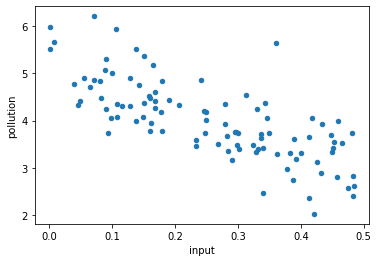

In [ ]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')

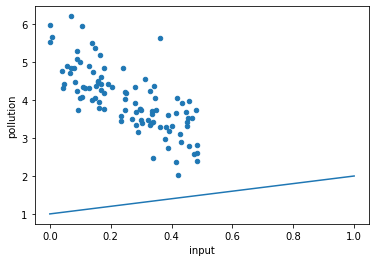

In [ ]:
w, b = 1, 1
x0, x1 = 0.0, 1.0
def h(x, w, b):       # 가설에 따라 값을 계산하는 함수 
    return w*x + b

# 데이터(산포도)와 가설(직선)을 비교 
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

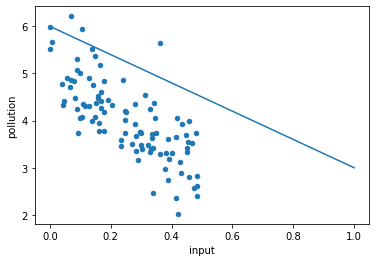

In [ ]:
w, b = -3, 6
x0, x1 = 0.0, 1.0

# 새로운 파라미터로 가설(직선)과 데이터(산포도) 비교 
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

### 4.4 좋은 가설과 모델의 오차

In [ ]:
import numpy as np

y_hat = np.array([1.2, 2.1, 2.9, 4.1, 4.7, 6.3, 7.1, 7.7, 8.5, 10.1])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
diff_square = (y_hat - y)**2
e_mse = diff_square.sum() / len(y)
e_mse

0.06099999999999996

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_hat, y))

Mean squared error: 0.06099999999999996


In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:', mean_absolute_error(y_hat, y))

Mean absolute error: 0.20999999999999988


### 4.5 데이터의 관계를 설명하는 선형회귀 함수의 시각적 이해

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# 5개 점의 x, y 좌표값
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w_list = np.arange(1.0, 0.2, -0.1)
for w in list(w_list):     # w를 바꾸어가며 예측치와 정답의 오차 비교
   y_hat = w * x
   print('w = {:.1f}, 평균제곱 오차: {:.2f}'.format(w, mse(y_hat, y)))

w = 1.0, 평균제곱 오차: 23.08
w = 0.9, 평균제곱 오차: 15.86
w = 0.8, 평균제곱 오차: 10.13
w = 0.7, 평균제곱 오차: 5.89
w = 0.6, 평균제곱 오차: 3.13
w = 0.5, 평균제곱 오차: 1.85
w = 0.4, 평균제곱 오차: 2.06
w = 0.3, 평균제곱 오차: 3.75


### 4.6 오차의 종류에 따른 오차 곡면의 모습

### 4.7 오차로 가설을 평가하고 좋은 가설 찾기

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

def h(x, w, b):
    return w*x + b

w, b = -3, 6  # w,b가  -3, 6일 때 h() 함수를 y^hat 함수로 가정

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
y_pred = h(x, w, b)
error = (y_pred - y)
error

array([ 0.4195784 ,  1.04971677,  1.33321941,  1.71184524,  1.47205094,
        1.29651981,  0.90796599,  1.60479092,  0.43274803,  1.34273875,
        1.04704019,  0.17173389,  1.62983969,  2.71606203,  0.76239547,
        0.81910416,  1.68277334,  1.84517464,  1.83123493,  1.05999343,
        1.54915161,  1.62613855,  1.35757149,  0.9559527 ,  0.69384839,
        1.43756403,  1.00967404,  0.68616603,  1.73449862,  1.23144237,
        2.00034361,  1.34951392,  0.32087407, -0.2647334 ,  1.97698033,
        1.18131751,  1.72325619,  1.80163473, -0.42384495,  1.27631632,
        1.07877757,  0.64225129,  1.22905797,  1.07590731,  1.55013999,
        0.76691574,  1.67240252,  1.10559534,  1.27540987, -0.73003295,
        1.27263587,  1.63061935,  1.35614568,  1.58218579,  2.39535838,
        1.48261159,  1.524646  ,  1.60174464,  0.47302039,  1.09862732,
        1.22260149,  1.56899704,  0.02277376,  2.1449076 ,  1.47727095,
        1.8862379 ,  1.21790966,  2.51660705,  1.23173843,  0.61

In [ ]:
learning_rate = 0.005
w = w - learning_rate * (error * x).sum()
b = b - learning_rate * error.sum()

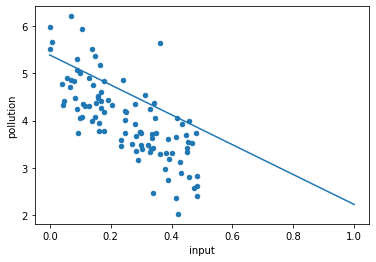

In [ ]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

### 4.8 기계 학습의 개념으로 해석하는 선형회귀 

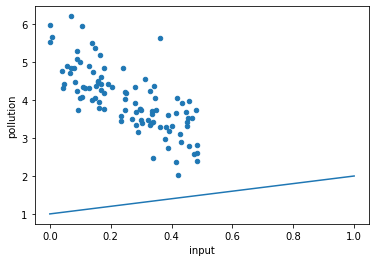

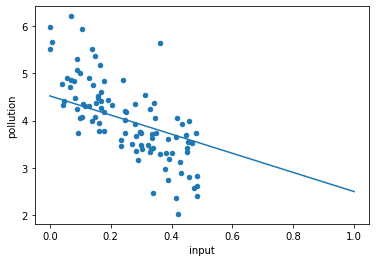

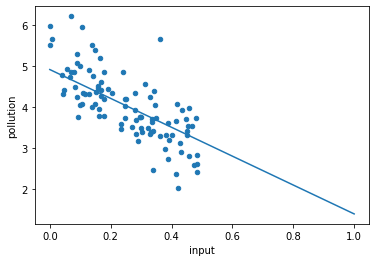

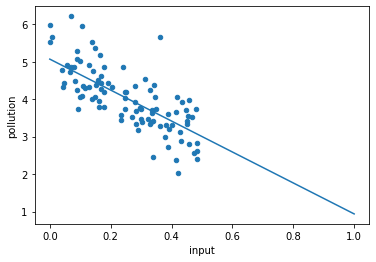

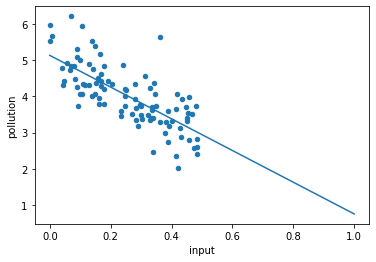

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

def h(x, param):
   return param[0]*x + param[1]

learning_iteration = 1000 # 하이퍼파라미터 : 학습반복 횟수
learning_rate = 0.0025    # 하이퍼파라미터 : 학습율로 0.05, 0.001등이 가능

param = [1, 1] # w, b

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()

for i in range(learning_iteration):
    if i % 200 == 0:
        lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
        plt.plot([0, 1], [h(0, param), h(1, param)])
    error = ( h(x, param) - y )
    param[0] -= learning_rate * (error * x).sum()
    param[1] -= learning_rate * error.sum()

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


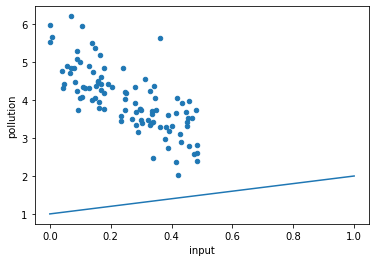

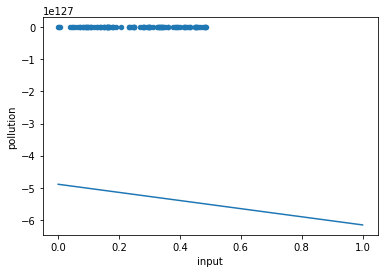

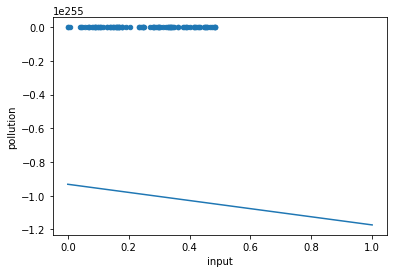

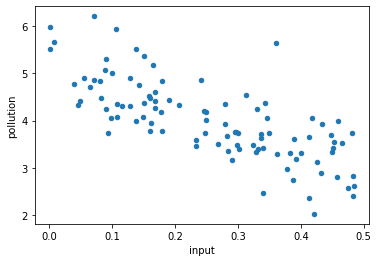

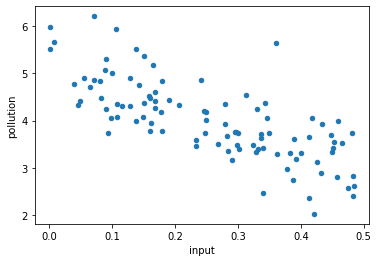

In [ ]:
learning_iteration = 1000
learning_rate = 0.05

param = [1, 1] # w, b

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()

for i in range(learning_iteration):
    if i % 200 == 0:
        lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
        plt.plot([0, 1], [h(0, param), h(1, param)])
    error = ( h(x, param) - y )
    param[0] -= learning_rate * (error * x).sum()
    param[1] -= learning_rate * error.sum()

### 4.9 Scikit-Learn을 이용한 선형 회귀

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

In [ ]:
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]     # 선형회귀 모델의 입력형식에 맞게 차원을 증가시킴
print(x)

[[0.24055707]
 [0.1597306 ]
 [0.10829455]
 [0.23377033]
 [0.28323537]
 [0.12808583]
 [0.34549075]
 [0.33271329]
 [0.09001426]
 [0.11620483]
 [0.20601359]
 [0.15000132]
 [0.39294774]
 [0.4209191 ]
 [0.33071579]
 [0.48175618]
 [0.26858081]
 [0.2328081 ]
 [0.45704999]
 [0.24569785]
 [0.38236759]
 [0.29856761]
 [0.29944705]
 [0.44841195]
 [0.09896587]
 [0.04793845]
 [0.15920226]
 [0.41791947]
 [0.16082931]
 [0.24851334]
 [0.47514699]
 [0.29708178]
 [0.1653657 ]
 [0.10529827]
 [0.0932346 ]
 [0.15023707]
 [0.48271145]
 [0.28364396]
 [0.07020281]
 [0.17768318]
 [0.46604517]
 [0.45860857]
 [0.27905958]
 [0.16777949]
 [0.32352937]
 [0.4329887 ]
 [0.32825247]
 [0.03894147]
 [0.33719318]
 [0.36048117]
 [0.08236935]
 [0.36232547]
 [0.33608776]
 [0.13852276]
 [0.41330502]
 [0.14950648]
 [0.24760616]
 [0.10715455]
 [0.00153907]
 [0.45324442]
 [0.16725705]
 [0.16088719]
 [0.00066376]
 [0.48323703]
 [0.0902836 ]
 [0.3775714 ]
 [0.3501837 ]
 [0.33927998]
 [0.45179427]
 [0.17890406]
 [0.16829187]
 [0.24

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

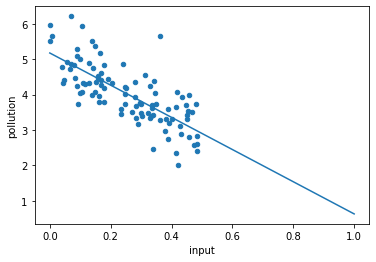

In [ ]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
y_pred = regr.predict([[0], [1]])
plt.plot([0, 1], y_pred)

### 4.10 다변량 회귀분석 - 수학적 모델

### 4.11 회귀분석의 학습, 혹은 최적화 방법 - 정규 방정식

In [ ]:
data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]
X = np.c_[np.ones((100, 1)), x]          
print(X)

[[1.00000000e+00 2.40557071e-01]
 [1.00000000e+00 1.59730598e-01]
 [1.00000000e+00 1.08294551e-01]
 [1.00000000e+00 2.33770334e-01]
 [1.00000000e+00 2.83235375e-01]
 [1.00000000e+00 1.28085826e-01]
 [1.00000000e+00 3.45490753e-01]
 [1.00000000e+00 3.32713292e-01]
 [1.00000000e+00 9.00142565e-02]
 [1.00000000e+00 1.16204832e-01]
 [1.00000000e+00 2.06013589e-01]
 [1.00000000e+00 1.50001317e-01]
 [1.00000000e+00 3.92947744e-01]
 [1.00000000e+00 4.20919103e-01]
 [1.00000000e+00 3.30715790e-01]
 [1.00000000e+00 4.81756183e-01]
 [1.00000000e+00 2.68580809e-01]
 [1.00000000e+00 2.32808098e-01]
 [1.00000000e+00 4.57049987e-01]
 [1.00000000e+00 2.45697851e-01]
 [1.00000000e+00 3.82367589e-01]
 [1.00000000e+00 2.98567613e-01]
 [1.00000000e+00 2.99447048e-01]
 [1.00000000e+00 4.48411946e-01]
 [1.00000000e+00 9.89658723e-02]
 [1.00000000e+00 4.79384512e-02]
 [1.00000000e+00 1.59202264e-01]
 [1.00000000e+00 4.17919473e-01]
 [1.00000000e+00 1.60829312e-01]
 [1.00000000e+00 2.48513337e-01]
 [1.000000

In [ ]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([ 5.17550358, -4.54449866])

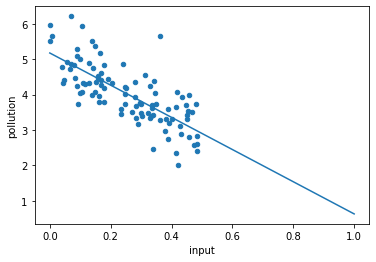

In [ ]:
def h(x, theta):        # 가설 함수
   return x*theta[1] + theta[0]


# 데이터와 가설을 비교
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')  # 데이터
plt.plot([0, 1], [h(0, theta), h(1, theta)])                   # 가설

### 4.12 정규 방정식의 유도와 시간 복잡도

### 4.13 다변량 선형 회귀 분석 - 데이터 확보하기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
life = life[['Life expectancy', 'Year', 'Alcohol',
           'Percentage expenditure', 'Total expenditure',
           'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP',
           'Thinness 1-19 years', 'Thinness 5-9 years']]
print(life)

      Life expectancy  Year  ...  Thinness 1-19 years  Thinness 5-9 years
0                65.0  2015  ...                 17.2                17.3
1                59.9  2014  ...                 17.5                17.5
2                59.9  2013  ...                 17.7                17.7
3                59.5  2012  ...                 17.9                18.0
4                59.2  2011  ...                 18.2                18.2
...               ...   ...  ...                  ...                 ...
2933             44.3  2004  ...                  9.4                 9.4
2934             44.5  2003  ...                  9.8                 9.9
2935             44.8  2002  ...                  1.2                 1.3
2936             45.3  2001  ...                  1.6                 1.7
2937             46.0  2000  ...                 11.0                11.2

[2938 rows x 12 columns]


### 4.14 다변량 선형 회귀 분석 - 예측에 필요한 데이터를 추려 보자

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()
life = life[['Life expectancy', 'Year', 'Alcohol',
           'Percentage expenditure', 'Total expenditure',
           'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP',
           'Thinness 1-19 years', 'Thinness 5-9 years']]
           
print(life.shape)
print(life.isnull().sum())

(2938, 12)
Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64


In [ ]:
life.dropna(inplace = True)
print(life.shape)

(1853, 12)


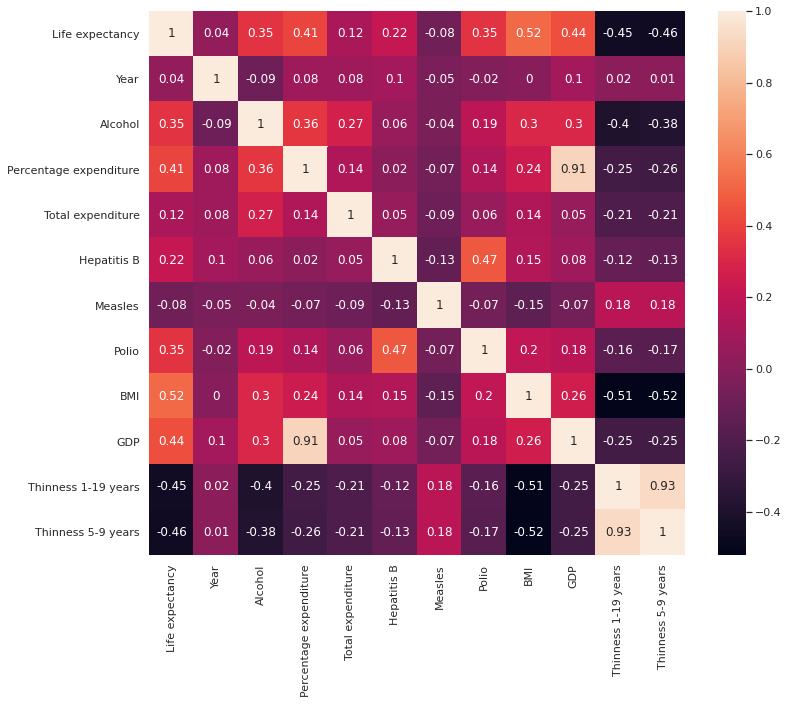

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})    # 상관행렬 가시
correlation_matrix = life.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()  # colab 등 노트북 환경에서는 필요없지만, 콘솔 환경 등에서는 필요

### 4.15 다변량 선형 회귀 분석 - 쌍 그림으로 확인하고 중요 특징만 추출

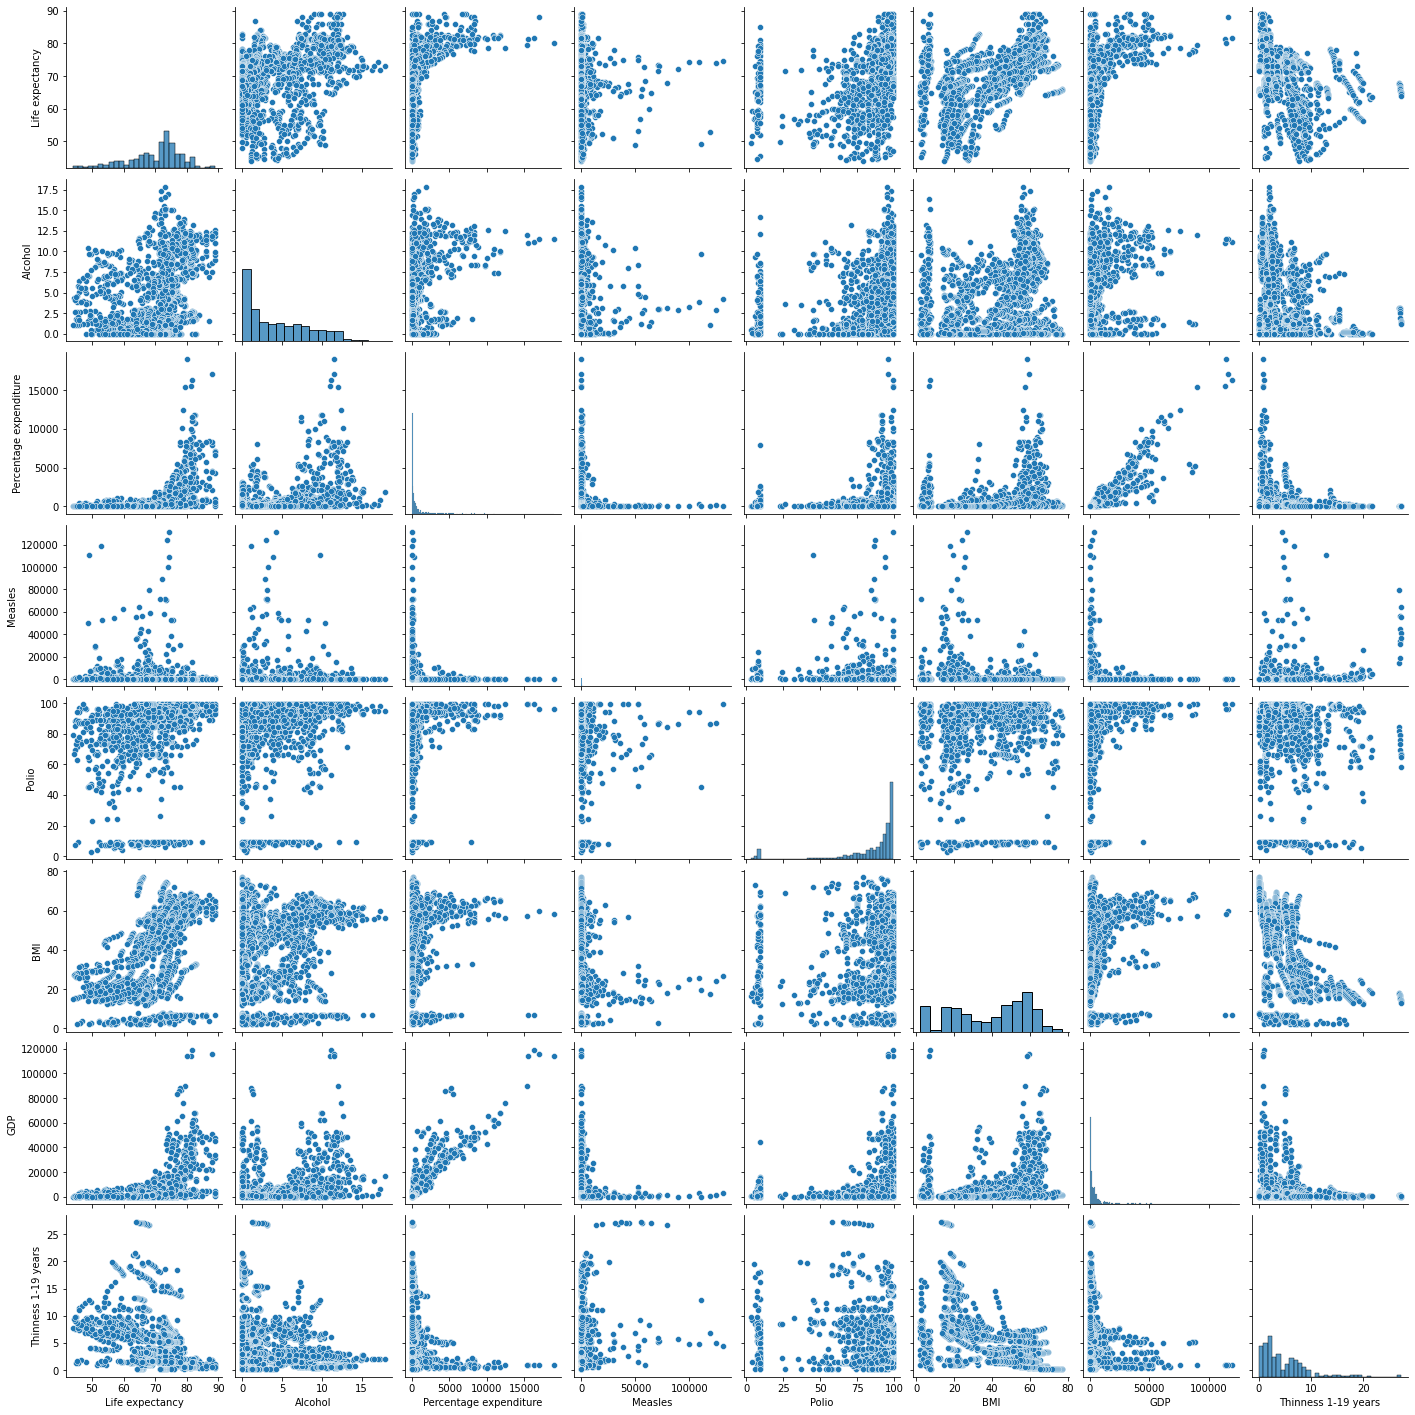

In [ ]:
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()  # colab 등 노트북 환경에서는 필요없지만, 콘솔 환경 등에서는 필요

In [ ]:
X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']
print(X)
print(y)

      Alcohol  Percentage expenditure  ...         GDP  Thinness 1-19 years
0        0.01               71.279624  ...  584.259210                 17.2
1        0.01               73.523582  ...  612.696514                 17.5
2        0.01               73.219243  ...  631.744976                 17.7
3        0.01               78.184215  ...  669.959000                 17.9
4        0.01                7.097109  ...   63.537231                 18.2
...       ...                     ...  ...         ...                  ...
2933     4.36                0.000000  ...  454.366654                  9.4
2934     4.06                0.000000  ...  453.351155                  9.8
2935     4.43                0.000000  ...   57.348340                  1.2
2936     1.72                0.000000  ...  548.587312                  1.6
2937     1.68                0.000000  ...  547.358879                 11.0

[1853 rows x 6 columns]
0       65.0
1       59.9
2       59.9
3       59.5
4       59.

### 4.16 다변량 선형 회귀 분석 - 데이터를 훈련용과 검증용으로 분리해 학습

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

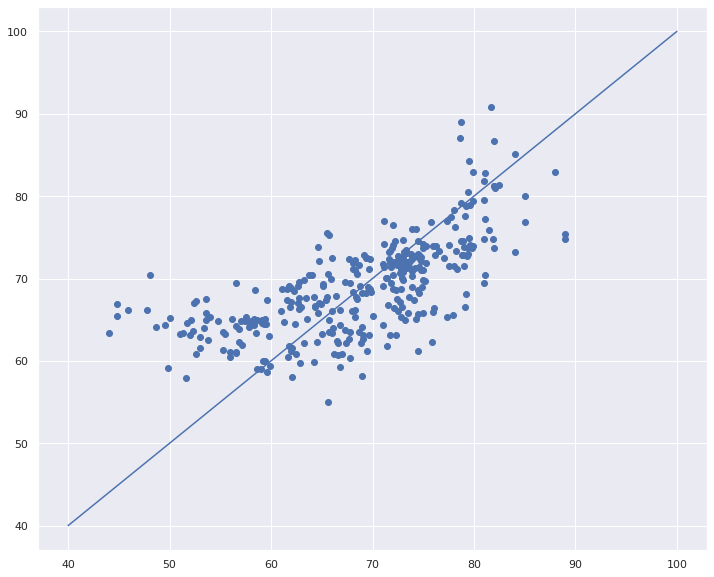

In [ ]:
y_hat_test = lin_model.predict(X_test)

plt.scatter(y_test, y_hat_test)  # 검증 데이터와 예측 데이터의 산포도
plt.plot(xy_range, xy_range)     # (40,40)에서 (10,100)으로 직선
                                 #   - 데이터가 이 직선과 일치할수록 예측이 정확


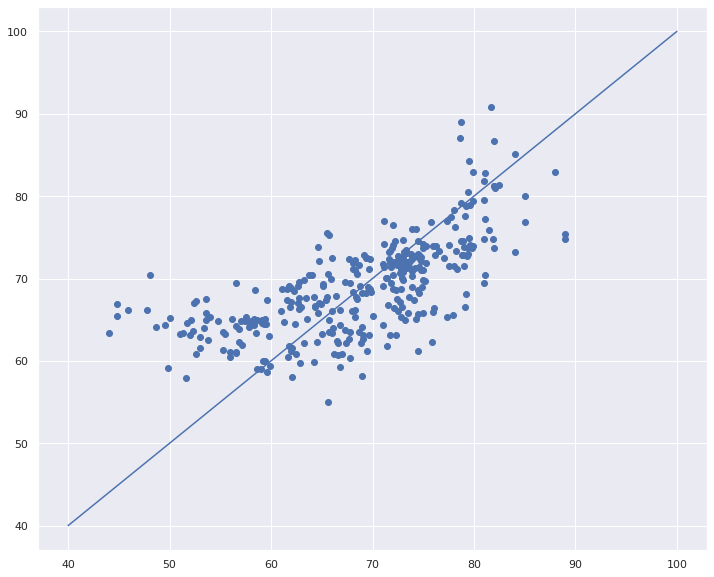

In [ ]:
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_test, y_hat_test)
plt.plot(xy_range, xy_range)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 43.04027536888435


### 4.17 데이터의 정규화를 통한 분석 성능 개선하기

In [ ]:
import pandas as pd

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [ ]:
from sklearn.preprocessing import normalize

n_X = normalize(X, axis = 0)

In [ ]:
print(np.linalg.norm(na0[0]))
print(np.linalg.norm(na0[:,0]))

1.213953957333768
1.0


In [ ]:
nXtrain, nXtest, y_train, y_test = train_test_split(n_X, y, test_size=0.2)
lin_model.fit(nXtrain, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

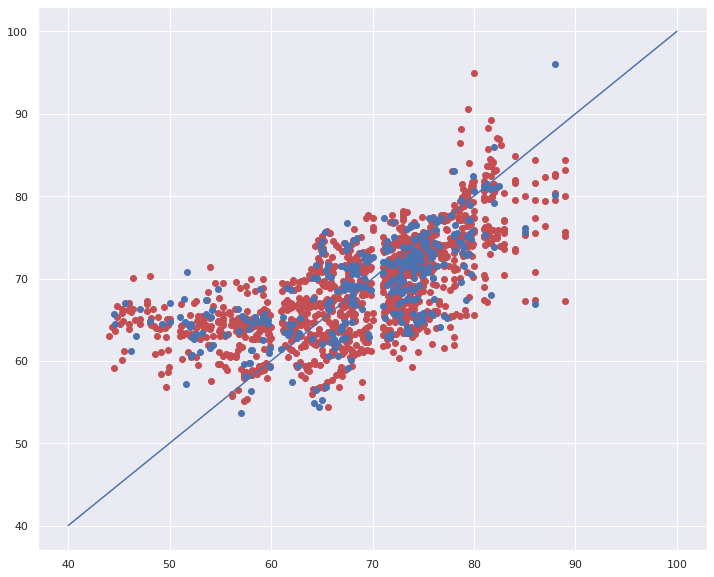

In [ ]:
y_hat_train = lin_model.predict(nXtrain)
y_hat_test = lin_model.predict(nXtest)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot(xy_range, xy_range)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 42.60118410774


### 4.18 다변량 선형 회귀 분석 -데이터의 표준화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

from sklearn.preprocessing import normalize

n_X = normalize(X, axis = 0)

(array([[1.579e+03, 7.000e+01, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.569e+03, 5.000e+01, 2.100e+01, 4.000e+00, 5.000e+00],
        [1.649e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.649e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.558e+03, 6.900e+01, 1.700e+01, 1.000e+00, 4.000e+00],
        [1.549e+03, 8.900e+01, 1.100e+01, 0.000e+00, 0.000e+00]]),
 array([0.        , 0.04934599, 0.09869198, 0.14803797, 0.19738396,
        0.24672995]),
 <a list of 6 Lists of Patches objects>)

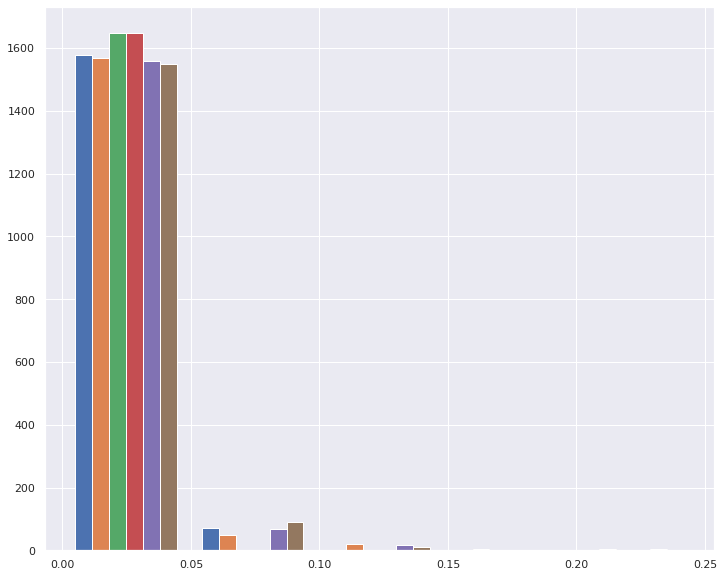

In [ ]:
plt.hist(n_X, bins=5)

(array([[ 515., 1092.,   42.,    0.,    0.],
        [   0., 1574.,   60.,   10.,    5.],
        [ 189., 1460.,    0.,    0.,    0.],
        [ 486., 1163.,    0.,    0.,    0.],
        [   0., 1566.,   72.,    7.,    4.],
        [ 281., 1274.,   85.,    9.,    0.]]),
 array([-3.5896224 , -0.7948891 ,  1.99984419,  4.79457749,  7.58931078,
        10.38404408]),
 <a list of 6 Lists of Patches objects>)

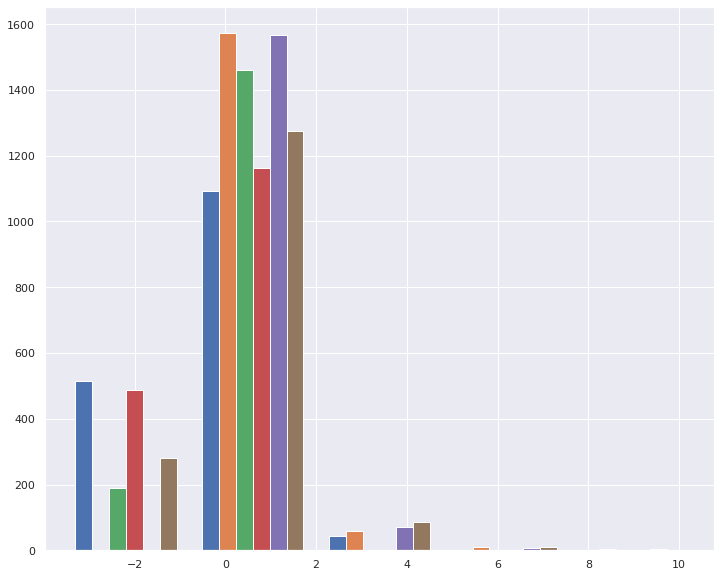

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
s_X = scaler.fit_transform(X)
plt.hist(s_X, bins=5)

In [ ]:
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2)

sXtrain = scaler.fit_transform(Xtrain)
sXtest = scaler.fit_transform(Xtest)

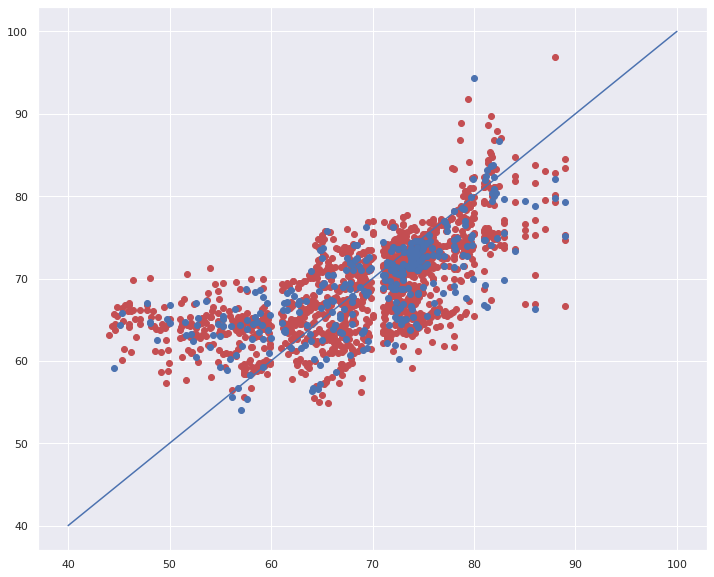

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(sXtrain, y_train)
y_hat_train = lin_model.predict(sXtrain)
y_hat_test = lin_model.predict(sXtest)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot(xy_range, xy_range)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 40.09501125158442
